In [22]:
import heapq
import networkx as nx
import contextlib
import matplotlib.pyplot as plt

def draw_weighted_graph(graph: nx.Graph, graph_dict: dict) -> None:

    for i,j in graph.edges():
        graph[i][j]['weight'] = graph_dict[i][j]

    weight_labels = nx.get_edge_attributes(graph,'weight')
    pos = nx.spring_layout(graph)

    fig, ax = plt.subplots(figsize=(8, 6))
    nx.draw(graph,pos, with_labels = True)
    with contextlib.redirect_stdout(None):
        nx.draw_networkx_edge_labels(graph, pos, edge_labels=weight_labels, font_size=7)

def dijkstra(graph, start):
    # Priority queue to store (cost, vertex) tuples
    priority_queue = [(0, start)]
    # Dictionary to store the shortest path to each vertex
    shortest_paths = {vertex: float('inf') for vertex in graph}
    # Start vertex has a distance of 0 from itself
    shortest_paths[start] = 0
    # Dictionary to store the previous node on the shortest path
    previous_nodes = {vertex: None for vertex in graph}

    while priority_queue:
        # Get the vertex with the smallest distance
        current_distance, current_vertex = heapq.heappop(priority_queue)

        # If the distance of the current vertex is greater than the recorded shortest path, skip it
        if current_distance > shortest_paths[current_vertex]:
            continue

        # Check the neighbors of the current vertex
        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight

            # If a shorter path to the neighbor is found
            if distance < shortest_paths[neighbor]:
                shortest_paths[neighbor] = distance
                previous_nodes[neighbor] = current_vertex
                heapq.heappush(priority_queue, (distance, neighbor))

    # Reconstruct the shortest path for each vertex
    paths = {}
    for vertex in graph:
        path = []
        current = vertex
        while current is not None:
            path.append(current)
            current = previous_nodes[current]
        path.reverse()
        paths[vertex] = path

    return shortest_paths, paths


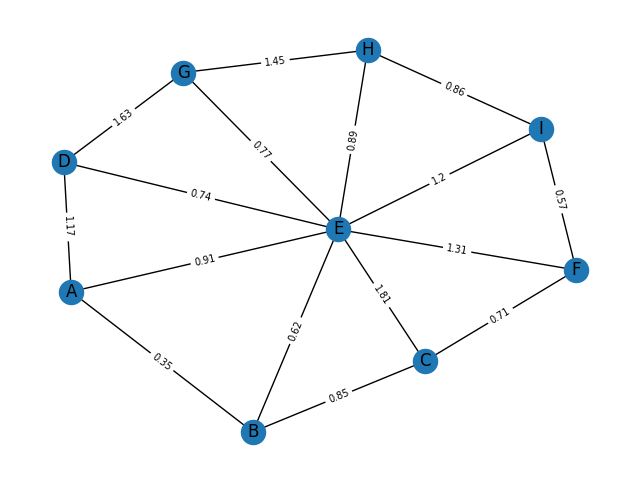

In [23]:
graph = {
    'A': {'B': 0.35, 'D': 1.17, 'E': 0.91},
    'B': {'A': 0.35, 'C': 0.85, 'E': 0.62},
    'C': {'B': 0.85, 'E': 1.81, 'F': 0.71},
    'D': {'A': 1.17, 'E': 0.74, 'G': 1.63},
    'E': {'A': 0.91, 'B': 0.62, 'C': 1.81, 'D': 0.74, 'F': 1.31, 'G': 0.77, 'H': 0.89, 'I': 1.2},
    'F': {'C': 0.71, 'E': 1.31, 'I': 0.57},
    'G': {'D': 1.63, 'E': 0.77, 'H': 1.45},
    'H': {'E': 0.89, 'G': 1.45, 'I': 0.86},
    'I': {'E': 1.2, 'F': 0.57, 'H': 0.86}
}

nx_graph = nx.Graph(graph)
draw_weighted_graph(nx_graph, graph)

In [28]:
start_vertex = 'A'
shortest_paths, paths = dijkstra(graph, start_vertex)
print("Udaljenosti i putanje:")
for i in shortest_paths:
    print(f'{i}: {shortest_paths[i]} | {"-".join(paths[i])}')

Udaljenosti i putanje:
A: 0 | A
B: 0.35 | A-B
C: 1.2 | A-B-C
D: 1.17 | A-D
E: 0.91 | A-E
F: 1.91 | A-B-C-F
G: 1.6800000000000002 | A-E-G
H: 1.8 | A-E-H
I: 2.11 | A-E-I
